In [38]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
fromage = pd.read_csv("http://www.math.u-bordeaux.fr/~mchave100p/wordpress/wp-content/uploads/2013/10/fromage.txt",sep="\t",header=0,index_col=0)

In [39]:
fromage

calories  sodium  calcium  lipides  retinol  folates  \
Fromages                                                                   
CarredelEst              314   353.5     72.6     26.3     51.6     30.3   
Babybel                  314   238.0    209.8     25.1     63.7      6.4   
Beaufort                 401   112.0    259.4     33.3     54.9      1.2   
Bleu                     342   336.0    211.1     28.9     37.1     27.5   
Camembert                264   314.0    215.9     19.5    103.0     36.4   
Cantal                   367   256.0    264.0     28.8     48.8      5.7   
Chabichou                344   192.0     87.2     27.9     90.1     36.3   
Chaource                 292   276.0    132.9     25.4    116.4     32.5   
Cheddar                  406   172.0    182.3     32.5     76.4      4.9   
Comte                    399    92.0    220.5     32.4     55.9      1.3   
Coulomniers              308   222.0     79.2     25.6     63.6     21.1   
Edam                     327   148.0    272.2     24.7     65.7      5.5   
Emmental                 378    60.0    308.2     29.4     56.3      2.4   
Fr.chevrepatemolle       206   160.0     72.8     18.5    150.5     31.0   
Fr.fondu.45              292   390.0    168.5     24.0     77.4      5.5   
Fr.frais20nat.            80    41.0    146.3      3.5     50.0     20.0   
Fr.frais40nat.           115    25.0     94.8      7.8     64.3     22.6   
Maroilles                338   311.0    236.7     29.1     46.7      3.6   
Morbier                  347   285.0    219.0     29.5     57.6      5.8   
Parmesan                 381   240.0    334.6     27.5     90.0      5.2   
Petitsuisse40            142    22.0     78.2     10.4     63.4     20.4   
PontlEveque              300   223.0    156.7     23.4     53.0      4.0   
Pyrenees                 355   232.0    178.9     28.0     51.5      6.8   
Reblochon                309   272.0    202.3     24.6     73.1      8.1   
Rocquefort               370   432.0    162.0     31.2     83.5     13.3   
SaintPaulin              298   205.0    261.0     23.3     60.4      6.7   
Tome                     321   252.0    125.5     27.3     62.3      6.2   
Vacherin                 321   140.0    218.0     29.3     49.2      3.7   
Yaourtlaitent.nat.        70    91.0    215.7      3.4     42.9      2.9   

                    proteines  cholesterol  magnesium  
Fromages                                               
CarredelEst              21.0           70         20  
Babybel                  22.6           70         27  
Beaufort                 26.6          120         41  
Bleu                     20.2           90         27  
Camembert                23.4           60         20  
Cantal                   23.0           90         30  
Chabichou                19.5           80         36  
Chaource                 17.8           70         25  
Cheddar                  26.0          110         28  
Comte                    29.2          120         51  
Coulomniers              20.5           80         13  
Edam                     24.7           80         44  
Emmental                 29.4          110         45  
Fr.chevrepatemolle       11.1           50         16  
Fr.fondu.45              16.8           70         20  
Fr.frais20nat.            8.3           10         11  
Fr.frais40nat.            7.0           30         10  
Maroilles                20.4           90         40  
Morbier                  23.6           80         30  
Parmesan                 35.7           80         46  
Petitsuisse40             9.4           20         10  
PontlEveque              21.1           70         22  
Pyrenees                 22.4           90         25  
Reblochon                19.7           80         30  
Rocquefort               18.7          100         25  
SaintPaulin              23.3           70         26  
Tome                     21.8           80         20  
Vacherin                 17.6          

In [40]:
# on centre et on réduit

import sklearn
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
fromage_cr = sc.fit_transform(fromage.values)

In [41]:
#dimension des données

print(fromage.shape)

#statistiques descriptives

print(fromage.describe())


(29, 9)
         calories      sodium     calcium    lipides     retinol    folates  \
count   29.000000   29.000000   29.000000  29.000000   29.000000  29.000000   
mean   300.034483  210.086207  185.734483  24.158621   67.562069  13.010345   
std     91.914356  108.678923   72.528882   8.129642   24.163098  11.723339   
min     70.000000   22.000000   72.600000   3.400000   37.100000   1.200000   
25%    292.000000  140.000000  132.900000  23.400000   51.600000   4.900000   
50%    321.000000  223.000000  202.300000  26.300000   62.300000   6.400000   
75%    355.000000  276.000000  220.500000  29.100000   76.400000  21.100000   
max    406.000000  432.000000  334.600000  33.300000  150.500000  36.400000   

       proteines  cholesterol  magnesium  
count  29.000000    29.000000  29.000000  
mean   20.168966    74.586207  26.965517  
std     6.959788    28.245755  11.318388  
min     4.100000    10.000000  10.000000  
25%    17.800000    70.000000  20.000000  
50%    21.000000    80

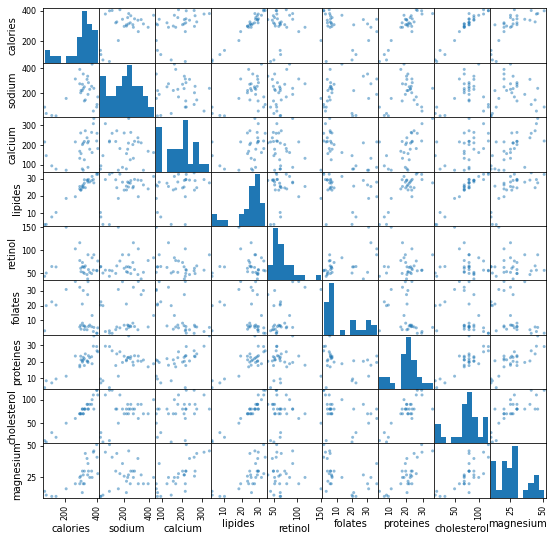

In [42]:
#graphique - croisement deux à deux des variables : corrélation deux a deux 

scatt_mat = scatter_matrix(fromage,figsize=(9,9))[-1]

## CAH

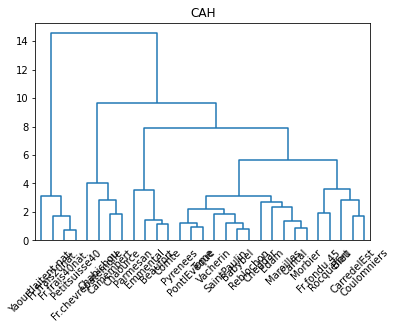

In [43]:
#librairies pour la CAH

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#générer la matrice des liens

Z = linkage(fromage_cr,method='ward',metric='euclidean')

#affichage du dendrogramme

plt.title("CAH")
dendrogram(Z,labels=fromage.index,orientation='top',color_threshold=0)
plt.show()

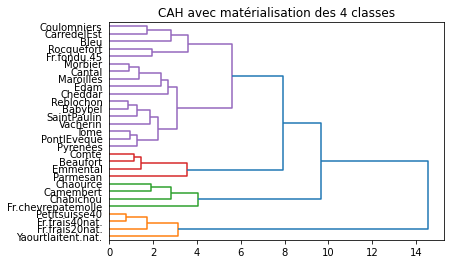

In [44]:
#matérialisation des 4 classes (hauteur t = 7)

plt.title('CAH avec matérialisation des 4 classes')
dendrogram(Z,labels=fromage.index,orientation='right',color_threshold=7)
plt.show()

In [45]:
#découpage à la hauteur t = 7 ==> identifiants de 4 groupes obtenus

groupes_cah = fcluster(Z,t=7,criterion='distance')  ## Attention ici la valeur de 7 correspond à la hauteur 
print(groupes_cah)


[4 4 3 4 2 4 2 2 4 3 4 4 3 2 4 1 1 4 4 3 1 4 4 4 4 4 4 4 1]


In [46]:
#index triés des groupes

idg = np.argsort(groupes_cah)

#affichage des observations et leurs groupes

print(pd.DataFrame(fromage.index[idg],groupes_cah[idg]))


             Fromages
1  Yaourtlaitent.nat.
1      Fr.frais20nat.
1       Petitsuisse40
1      Fr.frais40nat.
2  Fr.chevrepatemolle
2           Camembert
2           Chabichou
2            Chaource
3            Emmental
3            Parmesan
3            Beaufort
3               Comte
4            Pyrenees
4         PontlEveque
4          Rocquefort
4         SaintPaulin
4                Tome
4           Reblochon
4         CarredelEst
4           Maroilles
4            Vacherin
4                Edam
4         Coulomniers
4             Cheddar
4              Cantal
4                Bleu
4             Babybel
4             Morbier
4         Fr.fondu.45


Le 1er groupe est constitué de fromages frais.  
Le 2nd de fromages à pâte molle.  
Le 3ème de fromages durs.  
Le 4ème est un peu fourre-tout.  


## K-means

In [47]:
#k-means sur ##les données centrées et réduites##

from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=4)  # on choisit 4 avec l'étude du dessus
kmeans.fit(fromage_cr)

#index triés des groupes

print(kmeans.labels_)
idk = np.argsort(kmeans.labels_)

#affichage des observations et leurs groupes

print(pd.DataFrame(fromage.index[idk],kmeans.labels_[idk]))


[3 2 0 2 3 2 3 3 0 0 3 0 0 3 2 1 1 2 2 0 1 2 2 2 2 2 2 2 1]
             Fromages
0             Cheddar
0            Parmesan
0            Beaufort
0            Emmental
0                Edam
0               Comte
1       Petitsuisse40
1      Fr.frais20nat.
1  Yaourtlaitent.nat.
1      Fr.frais40nat.
2            Pyrenees
2           Reblochon
2          Rocquefort
2         SaintPaulin
2                Tome
2             Morbier
2         PontlEveque
2         Fr.fondu.45
2            Vacherin
2              Cantal
2                Bleu
2             Babybel
2           Maroilles
3  Fr.chevrepatemolle
3         Coulomniers
3            Chaource
3           Chabichou
3           Camembert
3         CarredelEst


In [48]:
#distances aux centres de classes des observations

dist_data = pd.DataFrame(kmeans.transform(fromage_cr),index = fromage.index)
print(dist_data)

                           0         1         2         3
Fromages                                                  
CarredelEst         4.961355  5.525639  2.874758  2.223661
Babybel             2.572349  5.190152  0.722708  3.017874
Beaufort            1.009182  7.505349  2.965545  5.161412
Bleu                3.713778  6.124589  2.058771  3.236961
Camembert           4.925560  5.403772  3.509210  1.933430
Cantal              2.011396  6.296011  1.228816  4.024862
Chabichou           4.305190  5.925956  3.416718  1.778697
Chaource            4.850715  5.554870  3.458989  1.032372
Cheddar             1.909428  6.824554  2.103287  3.748034
Comte               1.359632  7.842530  3.525334  5.442474
Coulomniers         4.444960  4.842860  2.491710  1.957956
Edam                1.384483  6.125677  2.293757  4.229224
Emmental            1.118710  7.477880  3.483546  5.526302
Fr.chevrepatemolle  6.868376  5.010448  5.536151  3.097303
Fr.fondu.45         4.202041  5.282331  1.811195  2.8370

In [49]:
#correspondance avec les groupes de la CAH

pd.crosstab(groupes_cah,kmeans.labels_)    ### cah : correspond au lignes 

col_0  0  1   2  3
row_0             
1      0  4   0  0
2      0  0   0  4
3      4  0   0  0
4      2  0  13  2

Il y bien correspondances entre les groupes proposés par la CAH et la méthode des K-means.

[0.48626255 0.36025261 0.34540073 0.29684146 0.27856806 0.29322991
 0.30858538 0.21993105 0.26464697 0.26207536 0.21842322 0.21268677
 0.18960134 0.19384753 0.18656152]


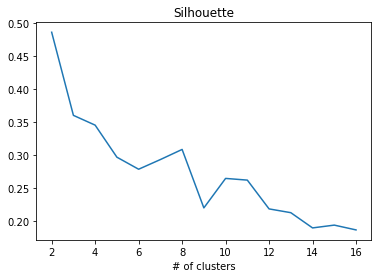

In [50]:
#librairie pour évaluation des partitions
from sklearn import metrics

#utilisation de la métrique "silhouette"
#faire varier le nombre de clusters de 2 à 16 avec un pas =2
res = np.arange(15,dtype="double")
for k in np.arange(15):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(fromage_cr)
    res[k] = metrics.silhouette_score(fromage_cr,km.labels_)
print(res)

#graphique
import matplotlib.pyplot as plt
plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,17,1),res)
plt.show()
# On retient le nbr de classe dont la valeur de Silhouette est max --> ici c'est deux classe 

D'autres metrics....  ('https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics')

[[ 0.64190118 -1.80278717]
 [-0.47244491  0.33317573]
 [-2.92868343  1.04937541]
 [-0.76334487 -0.69270042]
 [ 0.97433717 -1.92635759]
 [-1.64673594  0.62167571]
 [ 0.2115947  -2.08746096]
 [ 0.91401635 -2.48800307]
 [-1.90350409 -0.32790356]
 [-3.18010053  1.02494321]
 [ 0.84085401 -1.13460546]
 [-1.51773013  1.16291493]
 [-2.8769626   1.6743823 ]
 [ 3.16826783 -2.55883531]
 [ 0.25554034 -0.74898345]
 [ 4.80124463  1.8248518 ]
 [ 4.56033385  0.91187992]
 [-1.72874008  0.56232493]
 [-1.3001583   0.12510373]
 [-2.95797824  0.33655568]
 [ 4.33410754  0.85041934]
 [ 0.10194023  0.48660443]
 [-0.92593866  0.16244703]
 [-0.4583152  -0.09407671]
 [-1.07365199 -1.9028249 ]
 [-0.48172727  0.87153227]
 [-0.15819291 -0.32931643]
 [-0.66841754  1.12231053]
 [ 4.23848886  2.97335807]]
[3 2 0 2 3 2 3 3 0 0 3 0 0 3 2 1 1 2 2 0 1 2 2 2 2 2 2 2 1]


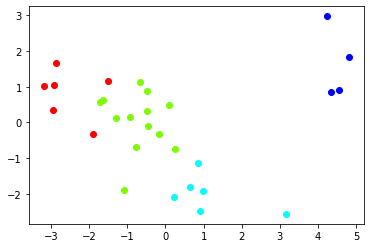

In [51]:
#ACP

from sklearn.decomposition import PCA
acp = PCA(n_components=2).fit_transform(fromage_cr)
print(acp)
print(kmeans.labels_)

#projeter dans le plan factoriel avec un code couleur différent selon le groupe

for couleur,k in zip(['red','blue','lawngreen','aqua'],[0,1,2,3]):
    plt.scatter(acp[kmeans.labels_==k,0],acp[kmeans.labels_==k,1],c=couleur)
plt.show()

#### problème:
le groupe 1 ici en vert, écrase les autres données en les tassant dans une partie du graphe.  
Il convient donc d'exclure ces données et de recommencer l'ACP dans un autre plan que ce plan factoriel.

In [52]:
#retirer des observations le groupe n°2 du k-means précédent (attention à l'indice du groupe à écarter)
fromage_subset = fromage.iloc[kmeans.labels_!=2,:]

print(fromage_subset.shape)
print(fromage_subset)

(16, 9)
                    calories  sodium  calcium  lipides  retinol  folates  \
Fromages                                                                   
CarredelEst              314   353.5     72.6     26.3     51.6     30.3   
Beaufort                 401   112.0    259.4     33.3     54.9      1.2   
Camembert                264   314.0    215.9     19.5    103.0     36.4   
Chabichou                344   192.0     87.2     27.9     90.1     36.3   
Chaource                 292   276.0    132.9     25.4    116.4     32.5   
Cheddar                  406   172.0    182.3     32.5     76.4      4.9   
Comte                    399    92.0    220.5     32.4     55.9      1.3   
Coulomniers              308   222.0     79.2     25.6     63.6     21.1   
Edam                     327   148.0    272.2     24.7     65.7      5.5   
Emmental                 378    60.0    308.2     29.4     56.3      2.4   
Fr.chevrepatemolle       206   160.0     72.8     18.5    150.5     31.0   
Fr.f

In [53]:
#centrer et réduire
fromage_subset_cr = sc.fit_transform(fromage_subset.values)
print(fromage_subset_cr)

[[ 0.32662676  1.96465617 -1.15602285  0.46043221 -0.82803976  1.00376946
   0.15541194  0.03002882 -0.48240046]
 [ 1.08820874 -0.45646692  0.98841675  1.1697638  -0.70968432 -1.21328491
   0.77984737  1.44314985  0.99111368]
 [-0.11106404  1.56865467  0.48904244 -0.22863277  1.01543588  1.46851282
   0.42302713 -0.25259538 -0.48240046]
 [ 0.58924123  0.34556143 -0.98841675  0.62256514  0.5527737   1.46089408
  -0.01184755  0.31265303  0.64027698]
 [ 0.13404281  1.1876912  -0.46378672  0.36923243  1.49603069  1.17138182
  -0.2014083   0.03002882 -0.13156376]
 [ 1.13197782  0.14505435  0.10331882  1.08869733  0.0614193  -0.9313914
   0.71294357  1.16052564  0.07893826]
 [ 1.07070111 -0.65697401  0.54184984  1.07856403 -0.67381904 -1.20566617
   1.06976382  1.44314985  1.69278709]
 [ 0.27410386  0.64632207 -1.08025571  0.38949905 -0.39765635  0.30284506
   0.09965878  0.31265303 -0.97357185]
 [ 0.44042636 -0.09555416  1.13535908  0.29829927 -0.32233925 -0.88567894
   0.56798535  0.312653

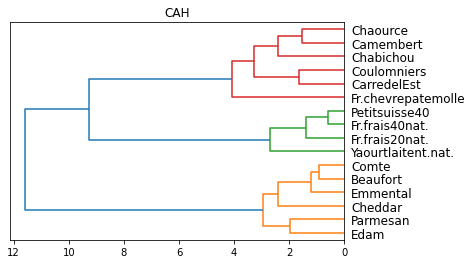

[3 1 3 3 3 1 1 3 1 1 3 2 2 1 2 2]


In [54]:
#générer la matrice des liens

Z_subset = linkage(fromage_subset_cr,method='ward',metric='euclidean')

#cah et affichage du dendrogramme

plt.title("CAH")
dendrogram(Z_subset,labels=fromage_subset.index,orientation='left',color_threshold=7)
plt.show()

#groupes

groupes_subset_cah = fcluster(Z_subset,t=7,criterion='distance')
print(groupes_subset_cah)

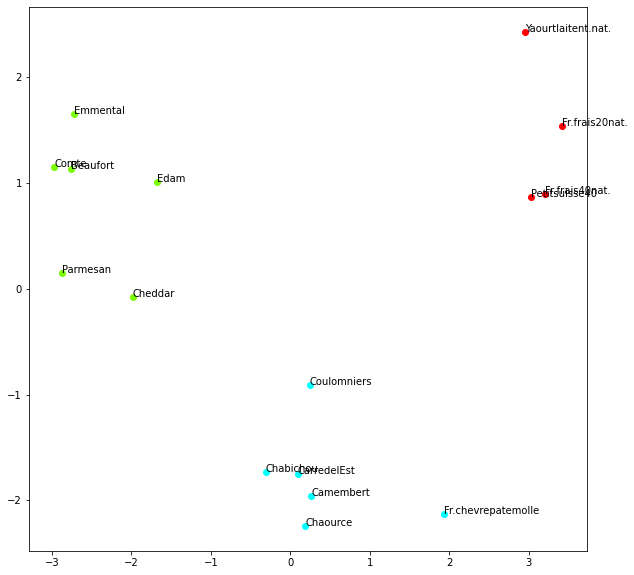

In [56]:
#ACP
acp_subset = PCA(n_components=2).fit_transform(fromage_subset_cr)
#projeter dans le plan factoriel
#avec un code couleur selon le groupe
#remarquer le rôle de zip()
plt.figure(figsize=(10,10))
for couleur,k in zip(['lawngreen','red','aqua'],[1,2,3]):
    plt.scatter(acp_subset[groupes_subset_cah==k,0],acp_subset[groupes_subset_cah==k,1],c=couleur)
#mettre les labels des points
#remarquer le rôle de enumerate()
for i,label in enumerate(fromage_subset.index):
    plt.annotate(label,(acp_subset[i,0],acp_subset[i,1]))
plt.show()

Quelques fromages ont changé de camp...

In [58]:
kmeans.labels_

array([3, 2, 0, 2, 3, 2, 3, 3, 0, 0, 3, 0, 0, 3, 2, 1, 1, 2, 2, 0, 1, 2,
       2, 2, 2, 2, 2, 2, 1], dtype=int32)

## Exercice:

Sur le jeu de données suivant: 
    * extraire les données sur les dimensions des pétales
    * effectuer une CAH
    * utilisiser la méthode K-Means
    * Comparer les méthode
    * peut-on dire que la classification est bonne comparée au numéro de l'espèce donné?
    * effectuer une ACP
    * doit-on recommencer en excluant un groupe?


In [19]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix



df = pd.read_excel('data/Iris.xls')  
df

Species_No  Petal_width  Petal_length  Sepal_width  Sepal_length  \
0             1          0.2           1.4          3.5           5.1   
1             1          0.2           1.4          3.0           4.9   
2             1          0.2           1.3          3.2           4.7   
3             1          0.2           1.5          3.1           4.6   
4             1          0.2           1.4          3.6           5.0   
..          ...          ...           ...          ...           ...   
145           3          2.3           5.2          3.0           6.7   
146           3          1.9           5.0          2.5           6.3   
147           3          2.0           5.2          3.0           6.5   
148           3          2.3           5.4          3.4           6.2   
149           3          1.8           5.1          3.0           5.9   

    Species_name  
0         Setosa  
1         Setosa  
2         Setosa  
3         Setosa  
4         Setosa  
..           ...  
145    Verginica  
146    Verginica  
147    Verginica  
148    Verginica  
149    Verginica  

[150 rows x 6 columns]

In [20]:
df.Species_name.unique()

array(['Setosa', 'Versicolor', 'Verginica'], dtype=object)

In [21]:
####################### #########################################
df_petale= df.iloc[: ,1:3]
df_petale
### CR ###
import sklearn
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
iris_cr = sc.fit_transform(df_petale.values)


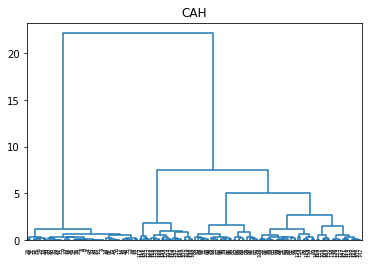

In [22]:
#librairies pour la CAH

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#générer la matrice des liens

Z = linkage(iris_cr,method='ward',metric='euclidean')

#affichage du dendrogramme

plt.title("CAH")
dendrogram(Z,labels=df.index,orientation='top',color_threshold=0)
plt.show()

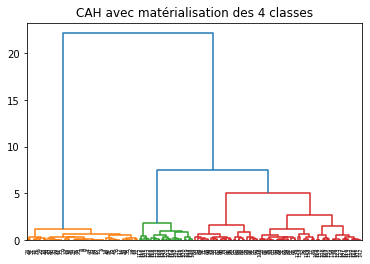

In [23]:
#matérialisation des 3classes (hauteur t = 8)

plt.title('CAH avec matérialisation des 4 classes')
dendrogram(Z,labels=df_petale.index,orientation='top',color_threshold=6)
plt.show()

In [24]:
#découpage à la hauteur t = 6==> identifiants de 3 groupes obtenus

groupes_cah = fcluster(Z,t=6,criterion='distance')  ## Attention ici la valeur de 7 correspond à la hauteur 
print(groupes_cah)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 3 2 2 3 3 3 2 3
 3 2 3 2 2 3 2 2 3 2 3 2 3 2 3 3 3 2 3 3 2 2 3 3 2 2 3 3 2 2 2 3 2 2 2 3 3
 2 3]


In [25]:
#index triés des groupes

idg = np.argsort(groupes_cah)

#affichage des observations et leurs groupes

print(pd.DataFrame(df_petale.index[idg],groupes_cah[idg]))

      0
1     0
1    27
1    28
1    29
1    30
..  ...
3    78
3    77
3    76
3    86
3   149

[150 rows x 1 columns]


In [26]:
#############################################################
################KMEAS ##############################
##########################################################

In [27]:
#k-means sur ##les données centrées et réduites##

from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=3)  # on choisit 4 avec l'étude du dessus
kmeans.fit(iris_cr)

#index triés des groupes

print(kmeans.labels_)
idk = np.argsort(kmeans.labels_)

#affichage des observations et leurs groupes

print(pd.DataFrame(df_petale.index[idk],kmeans.labels_[idk]))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
      0
0    74
0    75
0    73
0    72
0    71
..  ...
2   118
2   120
2   121
2   110
2   149

[150 rows x 1 columns]


In [28]:
pd.crosstab(groupes_cah,kmeans.labels_) 

col_0   0   1   2
row_0            
1       0  50   0
2       0   0  25
3      52   0  23

In [29]:
##Comparaison avec le numéro d'espace donnée 
##Comparaison avec Kmeans 
### 
df2 = df.copy()
for i in range (len(df2.Species_name)):
    
    if(df2.Species_name[i]=='Setosa'):
        df2.Species_name[i]=1
    if(df2.Species_name[i]=='Versicolor'):
        df2.Species_name[i]=2
    if(df2.Species_name[i]=='Verginica'):
        df2.Species_name[i]=3    


###
difference = 0
Commun = 0 

for i in range (len(df2)):
    if(kmeans.labels_[i] == df2.Species_name[i] ):
        Commun = Commun+1
    else :
        difference = difference+1
        
        



/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[

In [30]:
print("Classe commun avec Kmeans",Commun)
print("Classe differente des classe Kmeans" ,difference)


Classe commun avec Kmeans 52
Classe differente des classe Kmeans 98


In [31]:
######################Comparaison avec CAH ################

difference_cah = 0
Commun_cah = 0 

for i in range (len(df2)):
    if(groupes_cah[i] == df2.Species_name[i] ):
        Commun_cah = Commun_cah + 1
    else :
        difference_cah = difference_cah +1
        
        
##############################
print("Classe commun avec CAH",Commun_cah)
print("Classe differente des classe CAH" ,difference_cah)


Classe commun avec CAH 75
Classe differente des classe CAH 75


[[-1.87784285e+00  1.75236840e-02]
 [-1.87784285e+00  1.75236840e-02]
 [-1.91803298e+00  5.77138140e-02]
 [-1.83765272e+00 -2.26664460e-02]
 [-1.87784285e+00  1.75236840e-02]
 [-1.57111644e+00  8.31093143e-02]
 [-1.78476484e+00  1.10601694e-01]
 [-1.83765272e+00 -2.26664460e-02]
 [-1.87784285e+00  1.75236840e-02]
 [-1.93073073e+00 -1.15744456e-01]
 [-1.83765272e+00 -2.26664460e-02]
 [-1.79746259e+00 -6.28565760e-02]
 [-1.97092086e+00 -7.55543261e-02]
 [-2.09149125e+00  4.50160639e-02]
 [-1.95822311e+00  9.79039440e-02]
 [-1.65149670e+00  1.63489574e-01]
 [-1.73187696e+00  2.43869834e-01]
 [-1.78476484e+00  1.10601694e-01]
 [-1.66419445e+00 -9.96869583e-03]
 [-1.74457471e+00  7.04115642e-02]
 [-1.75727246e+00 -1.03046706e-01]
 [-1.65149670e+00  1.63489574e-01]
 [-2.03860337e+00  1.78284204e-01]
 [-1.47803843e+00  1.76187324e-01]
 [-1.67689220e+00 -1.83426966e-01]
 [-1.79746259e+00 -6.28565760e-02]
 [-1.61130657e+00  1.23299444e-01]
 [-1.83765272e+00 -2.26664460e-02]
 [-1.87784285e+00  1

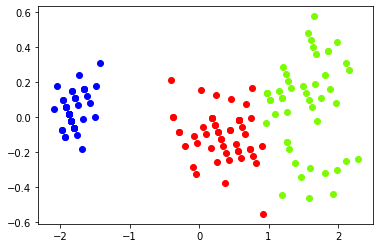

In [32]:
##############################ACP##############################
from sklearn.decomposition import PCA
acp = PCA(n_components=2).fit_transform(iris_cr)
print(acp)
print(kmeans.labels_)

#projeter dans le plan factoriel avec un code couleur différent selon le groupe

for couleur,k in zip(['red','blue','lawngreen'],[0,1,2]):
    plt.scatter(acp[kmeans.labels_==k,0],acp[kmeans.labels_==k,1],c=couleur)
plt.show()


In [33]:
#retirer des observations le groupe n°2 du k-means précédent (attention à l'indice du groupe à écarter)
iris_subset = df_petale.iloc[kmeans.labels_!=1,:]

print(iris_subset.shape)
print(iris_subset)

(100, 2)
     Petal_width  Petal_length
50           1.4           4.7
51           1.5           4.5
52           1.5           4.9
53           1.3           4.0
54           1.5           4.6
..           ...           ...
145          2.3           5.2
146          1.9           5.0
147          2.0           5.2
148          2.3           5.4
149          1.8           5.1

[100 rows x 2 columns]


In [34]:

#centrer et réduire
iris_subset_cr = sc.fit_transform(iris_subset.values)
print(iris_subset_cr)

#générer la matrice des liens

Z_subset = linkage(iris_subset_cr,method='ward',metric='euclidean')

#cah et affichage du dendrogramme

plt.title("CAH")
dendrogram(Z_subset,labels=iris_subset.index,orientation='top',color_threshold=7)
plt.show()

#groupes

groupes_subset_cah = fcluster(Z_subset,t=6,criterion='distance')
print(groupes_subset_cah)

[[-0.65303909 -0.25077906]
 [-0.41643072 -0.49425387]
 [-0.41643072 -0.00730424]
 [-0.88964745 -1.10294091]
 [-0.41643072 -0.37251647]
 [-0.88964745 -0.49425387]
 [-0.17982236 -0.25077906]
 [-1.59947255 -1.95510276]
 [-0.88964745 -0.37251647]
 [-0.65303909 -1.22467832]
 [-1.59947255 -1.71162795]
 [-0.41643072 -0.8594661 ]
 [-1.59947255 -1.10294091]
 [-0.65303909 -0.25077906]
 [-0.88964745 -1.58989054]
 [-0.65303909 -0.61599128]
 [-0.41643072 -0.49425387]
 [-1.59947255 -0.9812035 ]
 [-0.41643072 -0.49425387]
 [-1.36286418 -1.22467832]
 [ 0.29339437 -0.12904165]
 [-0.88964745 -1.10294091]
 [-0.41643072 -0.00730424]
 [-1.12625582 -0.25077906]
 [-0.88964745 -0.73772869]
 [-0.65303909 -0.61599128]
 [-0.65303909 -0.12904165]
 [ 0.05678601  0.11443316]
 [-0.41643072 -0.49425387]
 [-1.59947255 -1.71162795]
 [-1.36286418 -1.34641572]
 [-1.59947255 -1.46815313]
 [-1.12625582 -1.22467832]
 [-0.17982236  0.23617057]
 [-0.41643072 -0.49425387]
 [-0.17982236 -0.49425387]
 [-0.41643072 -0.25077906]
 

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [36]:
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=2)  # on choisit 4 avec l'étude du dessus
kmeans.fit(iris_subset_cr)

#index triés des groupes

print(kmeans.labels_)
idk = np.argsort(kmeans.labels_)

#affichage des observations et leurs groupes

print(pd.DataFrame(iris_subset.index[idk],kmeans.labels_[idk]))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
      0
0   149
0    77
0   122
0   121
0   120
..  ...
1    78
1    76
1    75
1    86
1    99

[100 rows x 1 columns]


In [37]:
##############################ACP##############################
from sklearn.decomposition import PCA
acp = PCA(n_components=2).fit_transform(iris_subset_cr)
print(acp)
print(kmeans.labels_)

#projeter dans le plan factoriel avec un code couleur différent selon le groupe

for couleur,k in zip(['red','blue'],[0,1]):
    plt.scatter(acp[kmeans.labels_==k,0],acp[kmeans.labels_==k,1],c=couleur)
plt.show()

[[-0.63909594  0.28444079]
 [-0.64395125 -0.05502928]
 [-0.29962587  0.28929611]
 [-1.40897274 -0.15082125]
 [-0.55786991  0.03105207]
 [-0.97856601  0.27958548]
 [-0.30448118 -0.05017396]
 [-2.51346431 -0.25146853]
 [-0.89248467  0.36566683]
 [-1.32774671 -0.40420998]
 [-2.34130161 -0.07930584]
 [-0.90219529 -0.31327332]
 [-1.91089488  0.35110089]
 [-0.63909594  0.28444079]
 [-1.75329813 -0.49514663]
 [-0.89733998  0.02619676]
 [-0.64395125 -0.05502928]
 [-1.82481354  0.43718223]
 [-0.64395125 -0.05502928]
 [-1.82966885  0.09771216]
 [ 0.11621492 -0.29870738]
 [-1.40897274 -0.15082125]
 [-0.29962587  0.28929611]
 [-0.9737107   0.61905555]
 [-1.1507287   0.10742279]
 [-0.89733998  0.02619676]
 [-0.55301459  0.37052214]
 [ 0.12107024  0.04076269]
 [-0.64395125 -0.05502928]
 [-2.34130161 -0.07930584]
 [-1.91575019  0.01163082]
 [-2.16913892  0.09285685]
 [-1.66236147 -0.06959522]
 [ 0.0398442   0.29415142]
 [-0.64395125 -0.05502928]
 [-0.47664387 -0.22233666]
 [-0.47178856  0.11713341]
 